# Decision Tree Classifier
* Decision trees are more versatile for different types of data and can model complex and non-linear relationships between features and the target. The downside is that decision trees are prone to overfitting if not properly pruned or regularized - use techniques such as tree depth limitation and pruning to enhance the generalizability of the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Generate data
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create a Decision Tree classifier
tree = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [None, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best Decision Tree model from grid search
best_tree = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_tree.predict(X_test)

# Calculate the accuracy of the model
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Best Max Depth: {best_tree.max_depth}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Best Max Depth: 7
Accuracy: 0.93
F1: 0.93
Precision: 0.91
Recall: 0.94


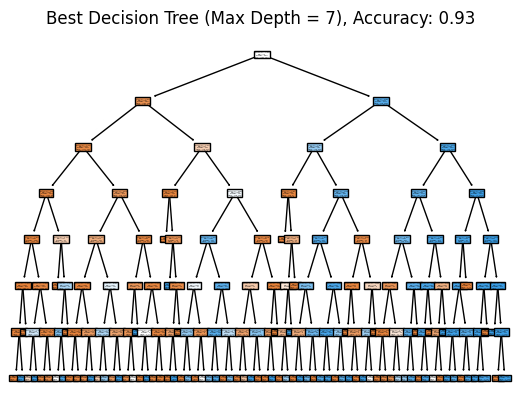

In [5]:
# Plot the decision boundary and tree
plot_tree(best_tree, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title(f'Best Decision Tree (Max Depth = {best_tree.max_depth}), Accuracy: {accuracy:.2f}')
plt.show()

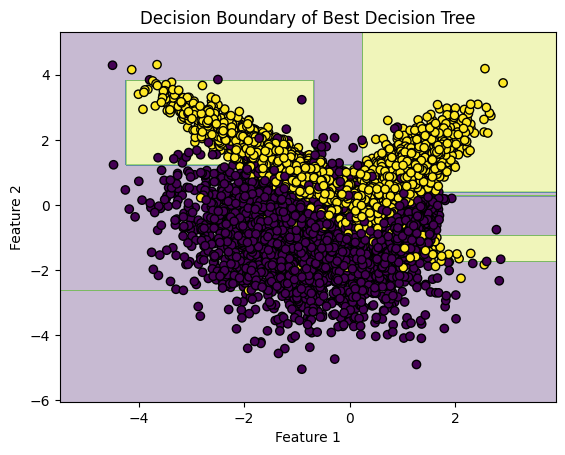

In [6]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = best_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Decision Boundary of Best Decision Tree')
plt.show()